In [2]:
import numpy as np
import matplotlib.pyplot as plt

# high quality plots
plt.rcParams['figure.dpi'] = 300

Note: The rest of the lab is on trinket but was too simple to re-produce here. 

### Logistic Map

One of the simplest mathematical systems that can exhibit chaotic behavior is the "logistic map", which is defined by the equation:

$$
x_{n+1}=a x_n\left(1-x_n\right)
$$

with $x_n \in \mathbb{R}$ (state variable) and $n \in \mathbb{N}$ (time step). Under repeated applications of this mapping, it can be shown that $x_n \in[0,1] \forall n$ given $a \in(0,4]$ and $x_0 \in[0,1]$. This is a discrete-time model of the differential growth introduced almost two centuries ago to model the dynamics of biological populations (Verhulst, 1838). This type of system is called an "iterative map", in which the value at a discrete point in time (e.g. $\mathrm{n}=1,2, \ldots, 99,100$ ) is mapped to the next point by the equation above. Because of the nonlinearity, this very simple iterative map is capable of complicated behavior. In particular, it can exhibit chaotic behavior above a critical value of the parameter $a$. For more background, please see the excellent explanation videos from Numberphile and Melanie Mitchell.
hile this system leads to very interesting mathematics, simulating its behavior is quite straightforward. We can implement a simulation of the logistic map by using the code below, starting with defined parameters, initializing an array of zeros "x" with the initial value "xo" in $\mathrm{x}[0]$, repeatedly applying the logistic map in a for loop, and then plotting the results.

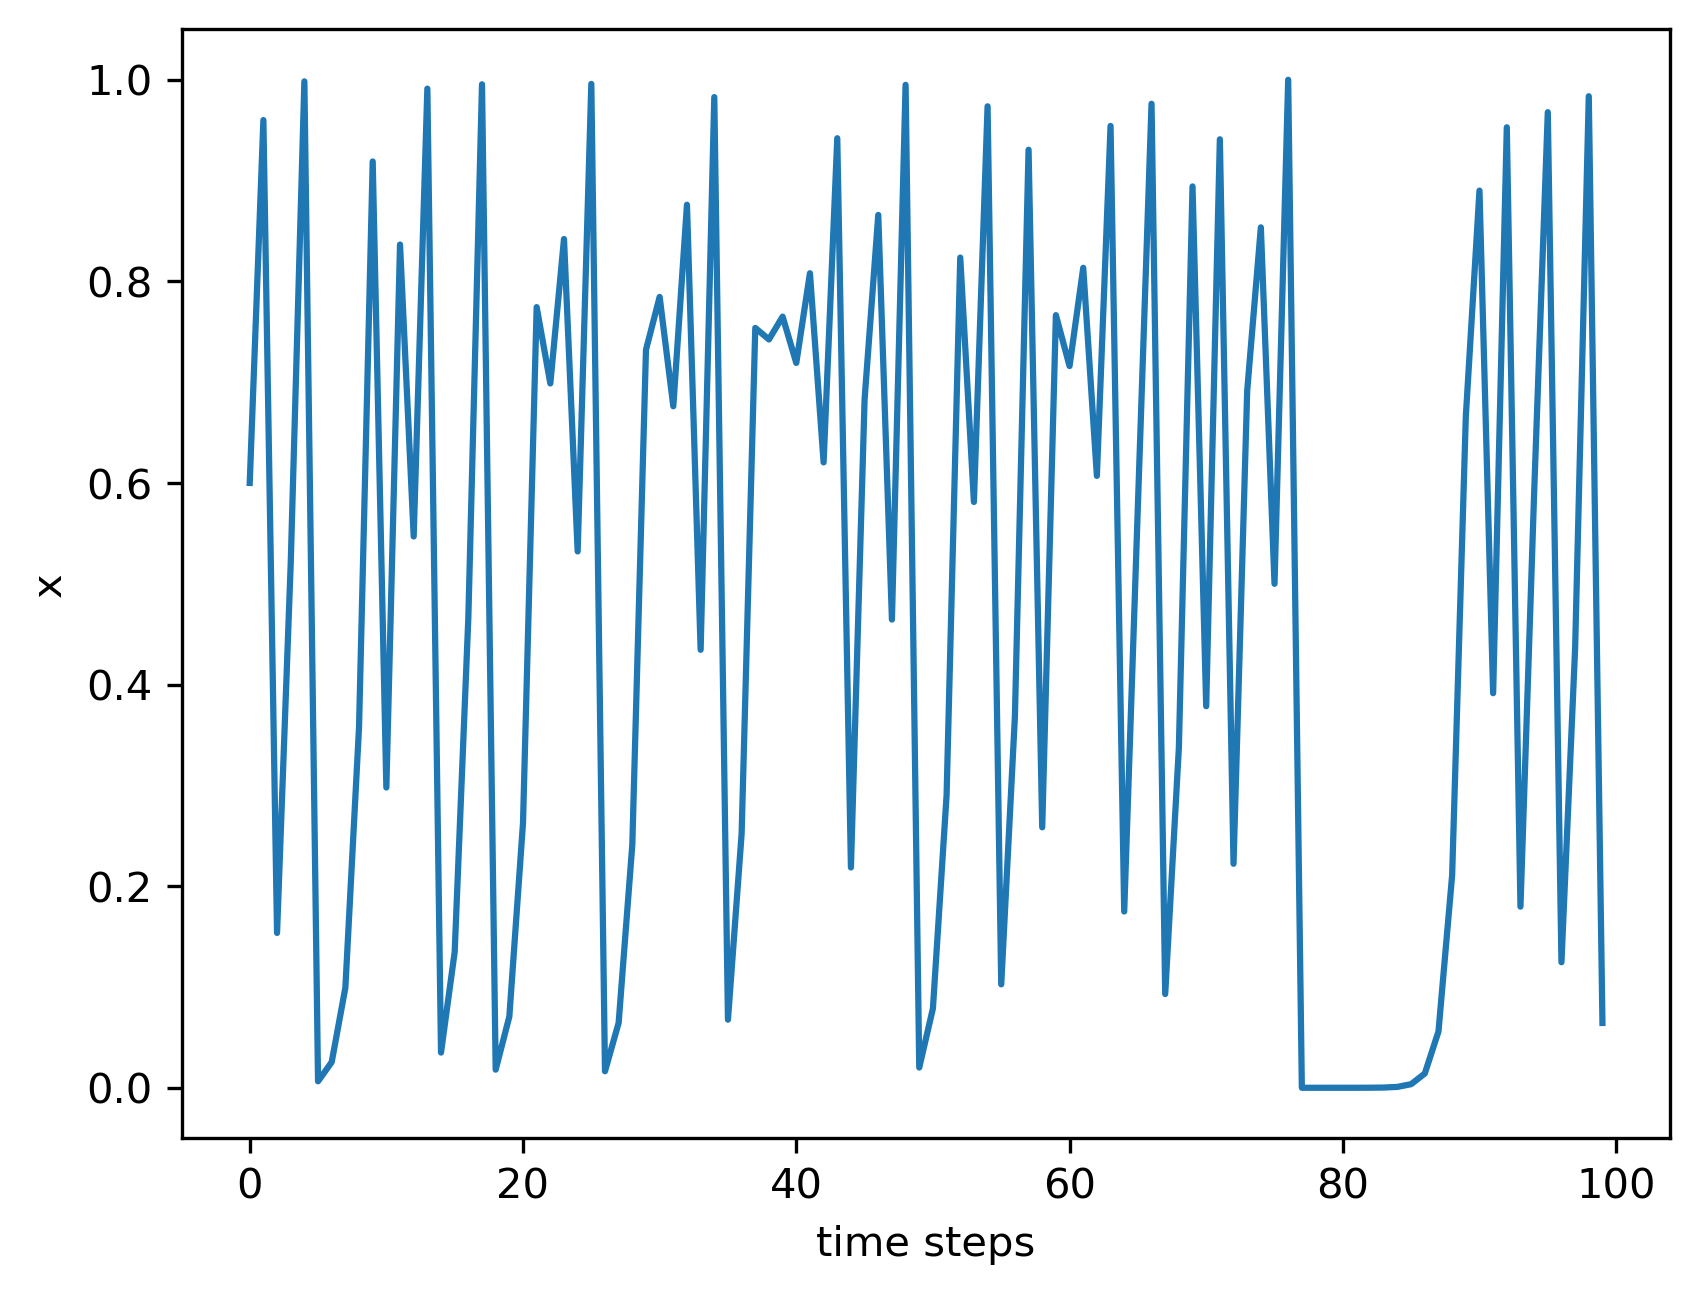

In [3]:
# parameters
a = 4; x0 = 0.6; nsteps = 100;

# init
x = np.zeros( nsteps ); x[0] = x0;

# run simulation
for ii in np.arange(1,nsteps): 
  x[ii] = a * x[ii-1] * ( 1 - x[ii-1] )

# plot results
plt.plot( x ); plt.xlabel( 'time steps' ); plt.ylabel( 'x' ); plt.show()

**Challenge question 1:** For a given initial condition $x_0$, simulate the logistic map for 100 time steps at increasing values of $a$ in the range from 1 to 4 . Can you find the value at which the behavior changes?

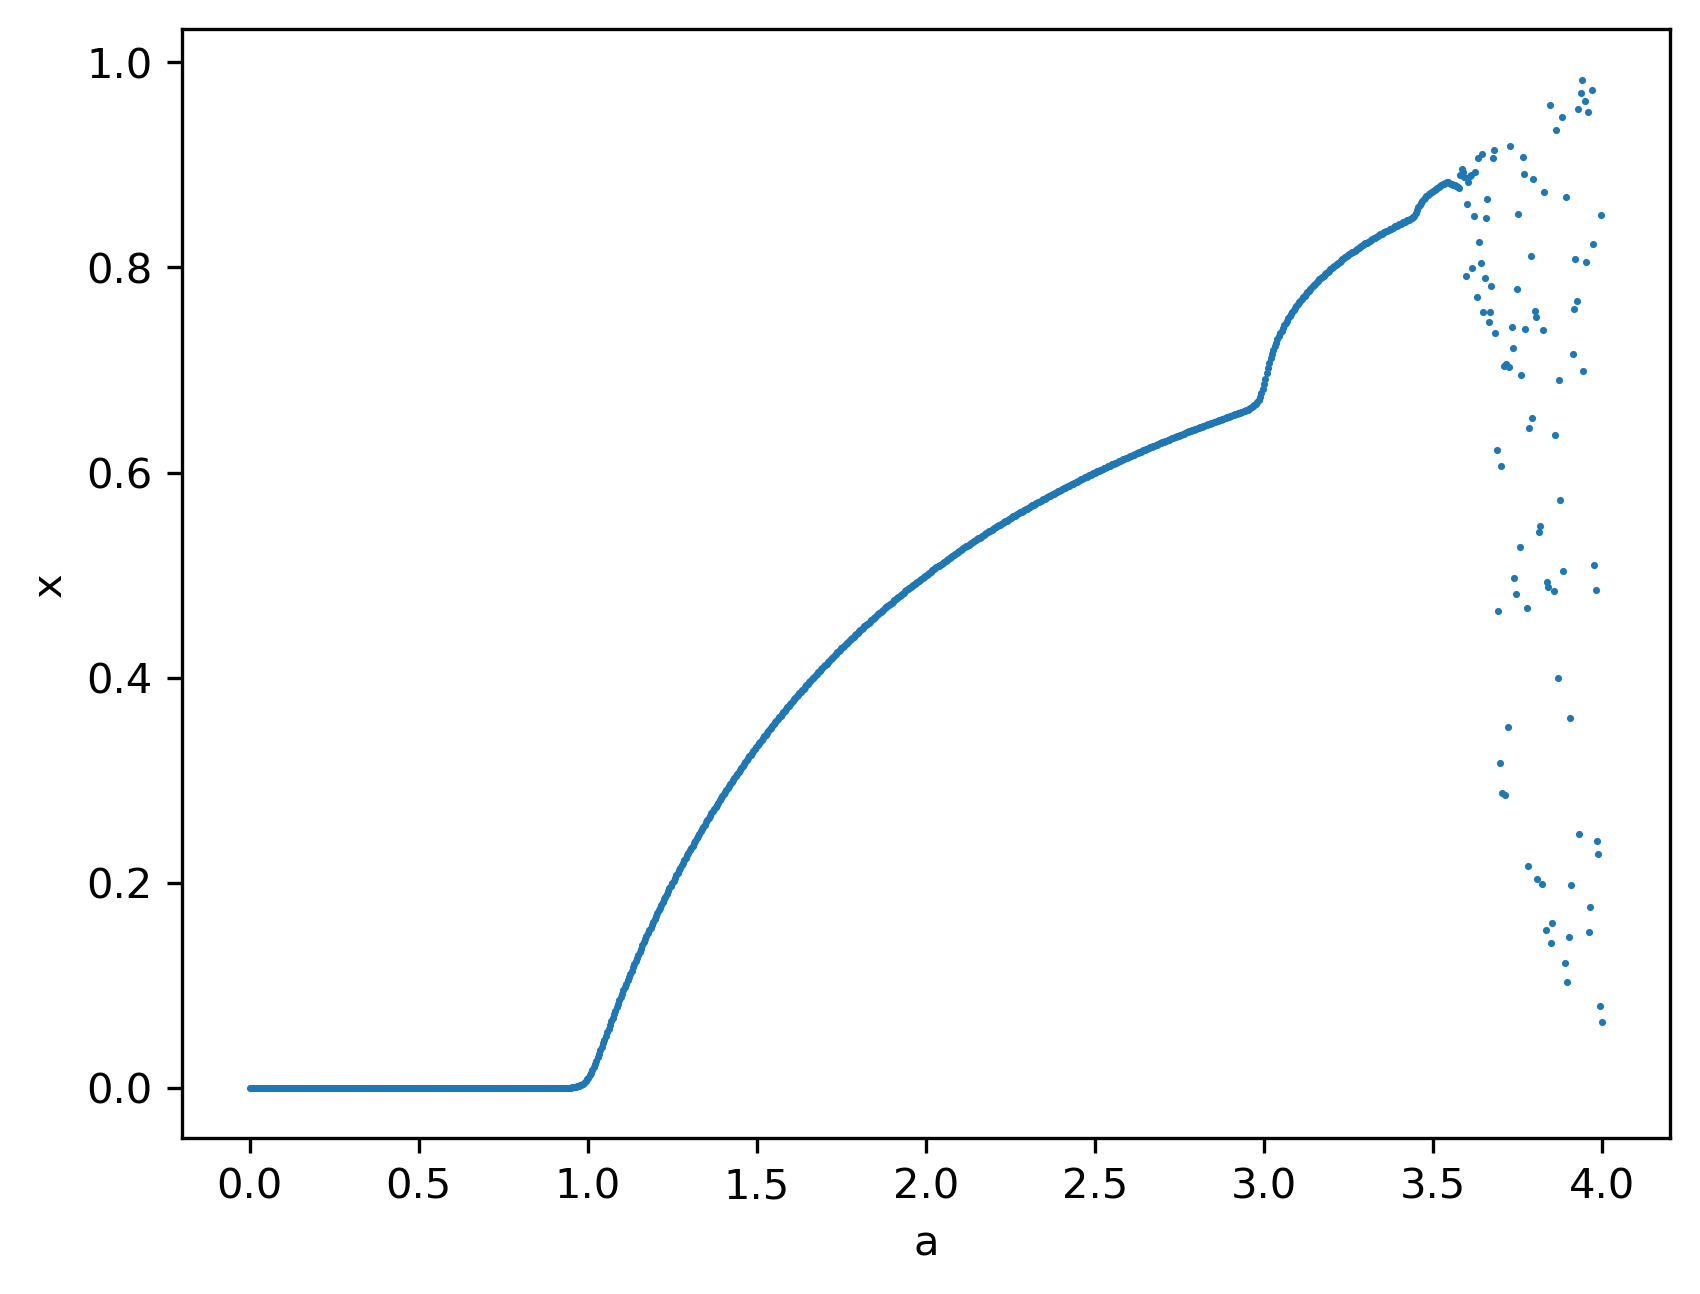

In [4]:
# create initial conditions and number of timesteps for each simulation
x0 = 0.6
nsteps = 100

# create a range of values for a
a = np.linspace( 0, 4, 1000 )

# create a matrix to store the results
results = np.zeros( (len(a), nsteps) )

# run the simulations
for ii in np.arange(len(a)):

  # reset the initial condition 
  x = np.zeros( nsteps ); x[0] = x0;

  # run the simulation for current value of a
  for jj in np.arange(1,nsteps): 
    x[jj] = a[ii] * x[jj-1] * ( 1 - x[jj-1] )
  results[ii,:] = x

# plot results
plt.scatter( a, results[:,nsteps-1], s=0.5)
plt.xlabel( 'a' ); plt.ylabel( 'x' ); plt.show()

(3.5, 4.0)

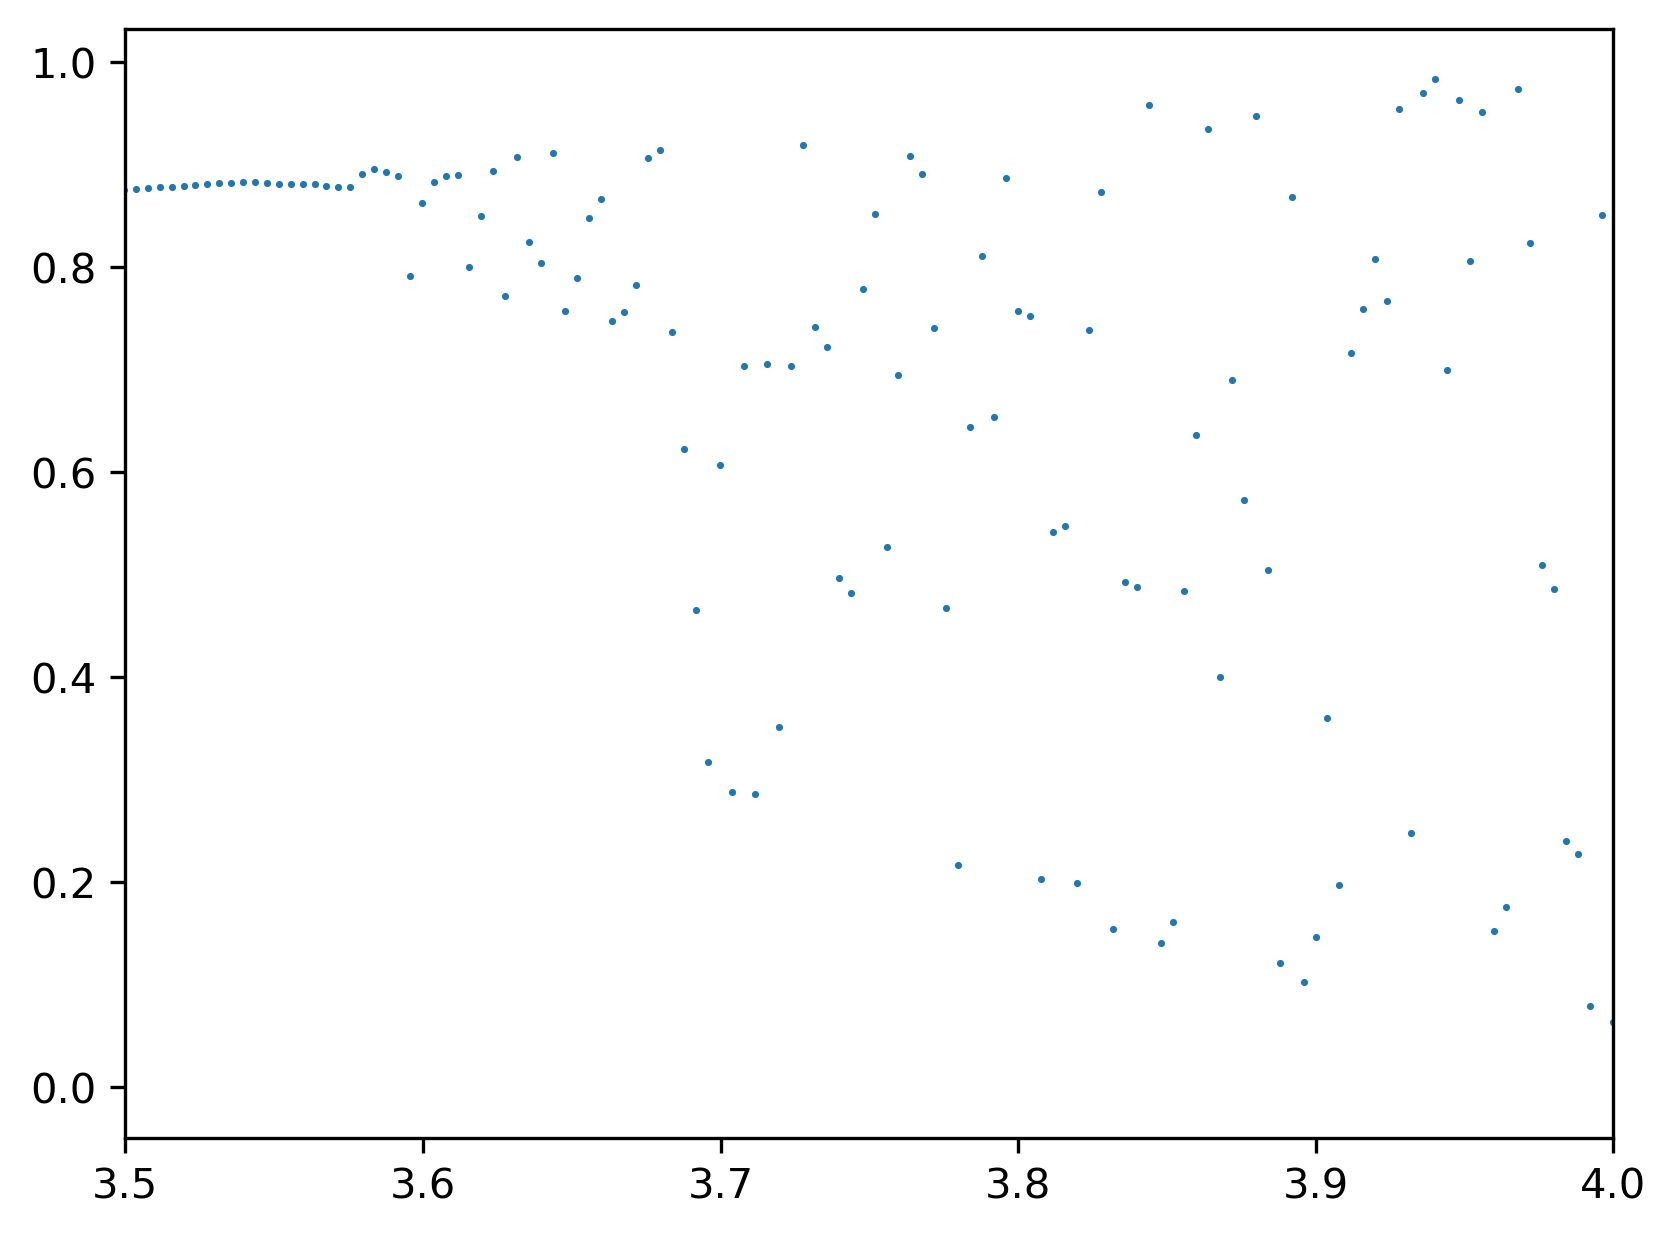

In [5]:
# plot results between 3.5 and 4
plt.scatter( a, results[:,nsteps-1], s=0.5)
plt.xlim(3.5,4)

In [6]:
import numpy as np

# find a value at which the system goes from stable to chaotic
# find the average difference between the max and min values of x for each value of a between 0 and 2.5
start = np.searchsorted(a, 0)
stop = np.searchsorted(a, 2.5)

diff = np.zeros(stop-start)

for ii in np.arange(start, stop):
    diff[ii-start] = np.mean(np.max(results[ii,:]) - np.min(results[ii,:]))

MovieWriter stderr:
[libopenh264 @ 0x5a5cb7252f80] Incorrect library version loaded
Error initializing output stream 0:0 -- Error while opening encoder for output stream #0:0 - maybe incorrect parameters such as bit_rate, rate, width or height



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1920x1440', '-pix_fmt', 'rgba', '-framerate', '10.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpqzmr6vup/temp.m4v']' returned non-zero exit status 1.

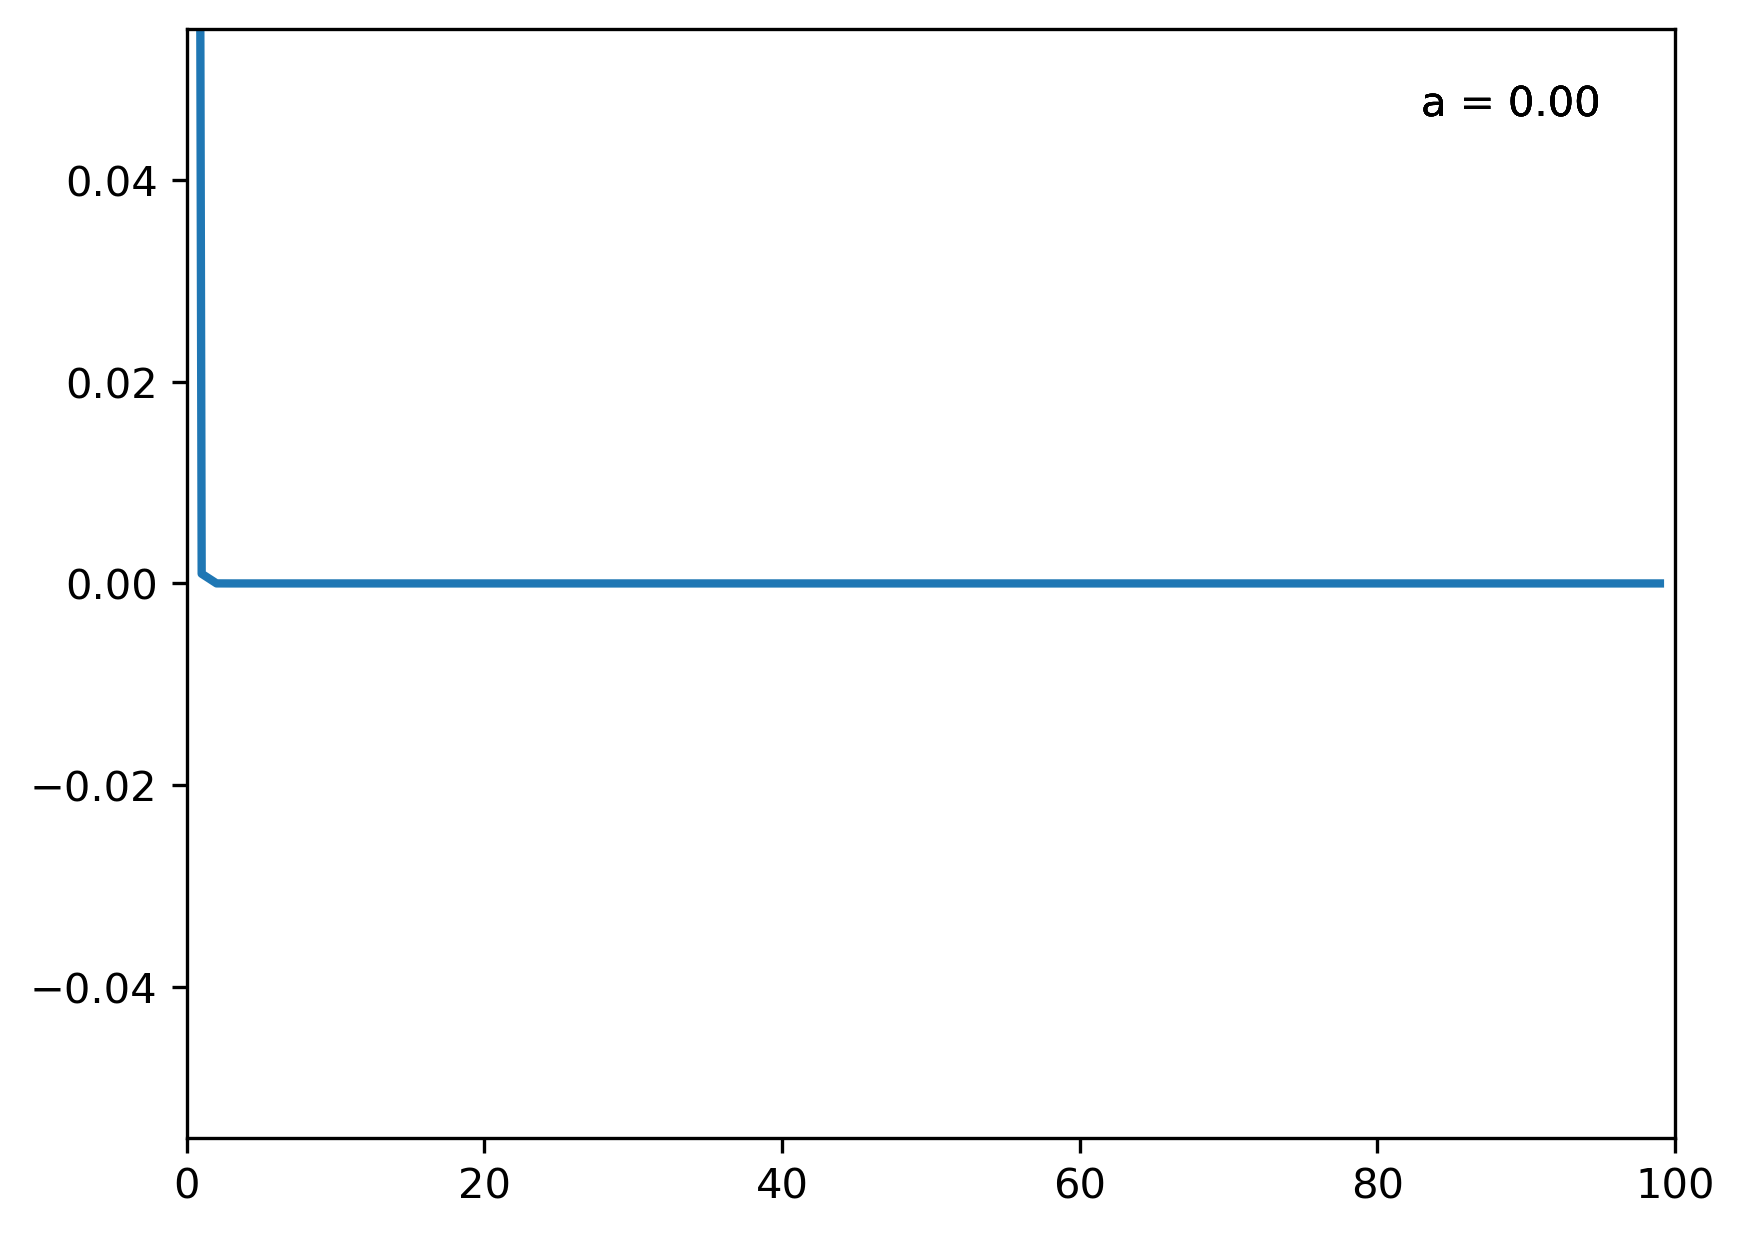

In [8]:
# import matplotlib animation
from matplotlib import animation

# animation function: this is called sequentially
def animate(i):
    x = np.arange(0, nsteps)
    y = results[i,:]
    line.set_data(x, y)
    
    # add label for the value of a
    ax.text(0.95, 0.95, f'a = {a[i+start]:.2f}', transform=ax.transAxes, ha='right', va='top')
    
    return (line,)

# create a figure and axis
fig, ax = plt.subplots()
ax.set_xlim((0, nsteps))

# plot the first value of a
line, = ax.plot([], [], lw=2)

# call the animator
anim = animation.FuncAnimation(fig, animate, frames=stop-start, interval=100, blit=True)

# save the animation
# anim.save('bifurcation.gif', fps=30)